In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

In [268]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [269]:
set_train = train_values.merge(train_labels)
set_train.drop( columns=["building_id"], inplace=True)
set_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


In [270]:
#verificamos si tenemos algun valor nulo
set_train.isnull().any()

geo_level_1_id                            False
geo_level_2_id                            False
geo_level_3_id                            False
count_floors_pre_eq                       False
age                                       False
area_percentage                           False
height_percentage                         False
land_surface_condition                    False
foundation_type                           False
roof_type                                 False
ground_floor_type                         False
other_floor_type                          False
position                                  False
plan_configuration                        False
has_superstructure_adobe_mud              False
has_superstructure_mud_mortar_stone       False
has_superstructure_stone_flag             False
has_superstructure_cement_mortar_stone    False
has_superstructure_mud_mortar_brick       False
has_superstructure_cement_mortar_brick    False
has_superstructure_timber               

In [271]:
#ELIMINO LAS FILAS DUPLICADAS, CHEQUEAR SI ES CORRECTO HACER ESTO
len_inicial=len(set_train)
set_train=set_train.drop_duplicates(keep=False)
len_final = len(set_train)

In [272]:
#CANTIDAD DE FILAS DUPLICADAS ELIMINADAS
len_inicial-len_final

22068

#Evaluamos como varian las categoricas numericas, para buscar datos que puedan
#perturbar el analisis. (por lo tanto binario no se evalua, categorico tampoco)


<AxesSubplot:ylabel='Frequency'>

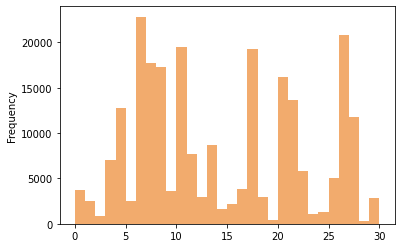

In [273]:
set_train['geo_level_1_id'].plot.hist(bins=30,color='#F2AB6D')

<AxesSubplot:ylabel='Frequency'>

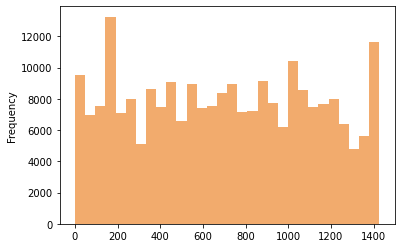

In [274]:
set_train['geo_level_2_id'].plot.hist(bins=30,color='#F2AB6D')

<AxesSubplot:ylabel='Frequency'>

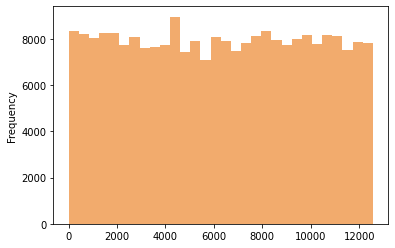

In [275]:
set_train['geo_level_3_id'].plot.hist(bins=30,color='#F2AB6D')

/home/juanfiuba/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='damage_grade', ylabel='count'>

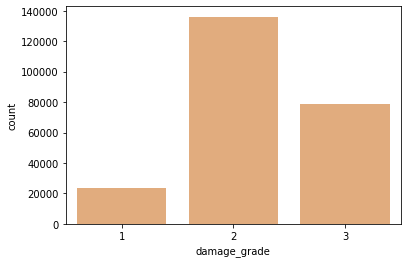

In [276]:
#set_train['damage_grade'].plot.hist(bins=3,color='#F2AB6D',rwidth=0.1,figsize=(10,4))
sns.countplot(set_train['damage_grade'],color='#F2AB6D')

<AxesSubplot:ylabel='Frequency'>

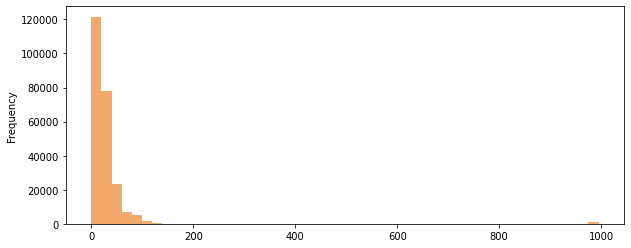

In [277]:
set_train['age'].plot.hist(bins=50,color='#F2AB6D',figsize=(10,4))

In [278]:
len(set_train)

238533

<AxesSubplot:ylabel='Frequency'>

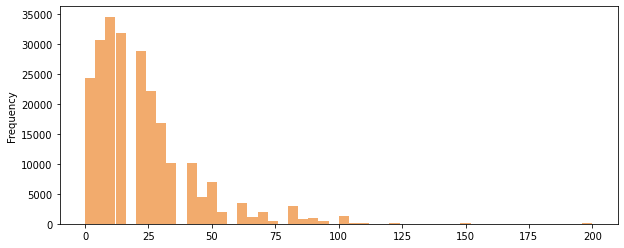

In [279]:
#REVISAR, ES CORRECTO ELIMINAR LAS FILAS? O ES MEJOR CAMBIAR LA EDAD
#se podria cambiar la edad de los mayores a 200 por 200
set_train = set_train[set_train['age'] <= 200]
set_train['age'].plot.hist(bins=50,color='#F2AB6D',figsize=(10,4))

In [280]:
#PERDIDA DE UNAS 1000 FILAS...
len(set_train)

237320

/home/juanfiuba/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count_floors_pre_eq', ylabel='count'>

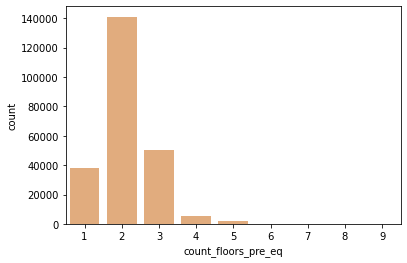

In [281]:
sns.countplot(set_train['count_floors_pre_eq'],color='#F2AB6D')

In [282]:
#Notamos la desproporcionalidad, decidimos eliminar el 8 y 9
#ACA LO MISMO SE PUEDE REEMPLAZAR EN VEZ DE ELIMINAR E INCLUSO TOMAR 
#TAMBIEN EL 6 Y 7 QUE ESTAN BASTANTE DESPROPORCIONADOS
set_train['count_floors_pre_eq'].value_counts()

2    141035
3     50596
1     38117
4      5187
5      2142
6       202
7        39
8         1
9         1
Name: count_floors_pre_eq, dtype: int64

In [283]:
set_train = set_train[set_train['count_floors_pre_eq'] <= 7]

<AxesSubplot:ylabel='Frequency'>

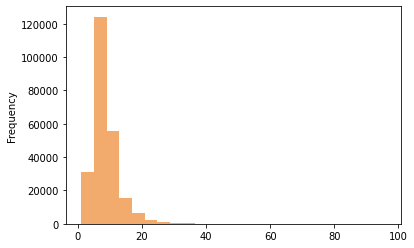

In [284]:
set_train['area_percentage'].plot.hist(bins=24,color='#F2AB6D')

<AxesSubplot:ylabel='Frequency'>

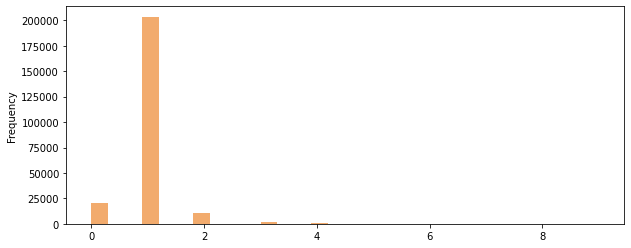

In [285]:
set_train['count_families'].plot.hist(bins=30,color='#F2AB6D',figsize=(10,4))

<AxesSubplot:ylabel='Frequency'>

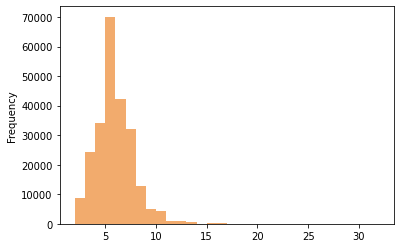

In [286]:
set_train['height_percentage'].plot.hist(bins=30,color='#F2AB6D')